# Анализ бизнес-показателей приложения Procrastinate Pro+.

## Описание проекта:

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

Цель исследования:

разобраться в причинах убытков и помочь компании выйти в плюс.

Ход исследования:

    
1. Обзор данных:
        
    - импорт библиотек;

    - чтение файлов с данными и сохранение в df;

    - просмотр строк таблиц;

    - просмотр информации по таблицам.
    
        
2.  Предоработка данных:
        
    - определить и изучить пропущенные значения;
        
    - выявить дубликаты;
        
    - привести данные к нужным типам;
        
        
3. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии: 
        
    - функция get_profiles() — для создания профилей пользователей; 
        
    - функция get_retention() — для подсчёта Retention Rate; 
      
    - функция get_conversion() — для подсчёта конверсии; 
        
    - функция get_ltv() — для подсчёта LTV; 
        
    - функция filter_data() — для сглаживания данных;
        
    - функция plot_retention() — для построения графика Retention Rate; 
        
    - функция plot_conversion() — для построения графика конверсии; 
        
    - функция plot_ltv_roi — для визуализации LTV и ROI.
    
        
4.  Исследовательский анализ данных: 
        
    - Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей; 
        
    - Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны;
        
    - Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства;
        
    - Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
        
        
5. Маркетинг: 
    
    - Посчитать общую сумму расходов на маркетинг;
        
    - Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник;
        
    - Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику;
        
    - Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
        
        
6. Оценить окупаемость рекламы:
     
   - Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI;
     
   - Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания;
     
   - Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI;
     
   - Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI;
     
   - Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI; 
     
   - Ответить на такие вопросы:
     
        * Окупается ли реклама, направленная на привлечение пользователей в целом?
     
        * Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
     
        * Чем могут быть вызваны проблемы окупаемости?
     
     
7. Написать выводы:
    
   - Выделить причины неэффективности привлечения пользователей;
      
   - Сформулировать рекомендации для отдела маркетинга.
   


Описание данных: 
    
В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.


Структура visits_info_short.csv:


  - User Id — уникальный идентификатор пользователя,
  
  - Region — страна пользователя,
  
  - Device — тип устройства пользователя,
  
  - Channel — идентификатор источника перехода,
  
  - Session Start — дата и время начала сессии,
  
  - Session End — дата и время окончания сессии.
  
Структура orders_info_short.csv:

  - User Id — уникальный идентификатор пользователя,
  
  - Event Dt — дата и время покупки,
  
  - Revenue — сумма заказа.
  
Структура costs_info_short.csv:

  - dt — дата проведения рекламной кампании,
  
  - Channel — идентификатор рекламного источника,
  
  - costs — расходы на эту кампанию.   

## Загрузите данные и подготовьте их к анализу

Импортируем нужные библиотеки. 

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
import matplotlib.pyplot as plt # импорт библиотеки matplotlib.pyplot
import seaborn as sns



from datetime import datetime, timedelta
from scipy import stats as st # импорт библиотеки stats

Сохраним данные в датафреймы.

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'), # журнал сессий 
    pd.read_csv('/datasets/orders_info_short.csv'), # покупки 
    pd.read_csv('/datasets/costs_info_short.csv') # траты на рекламу 
)


Посмотрим первые строки датафрейма visits.

In [3]:
visits.head() # просмотр первых строк датафрейма методом head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Изучим информацию о таблице. 

In [4]:
visits.info() # просмотр информации о датафрейме методом info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Тип данных в столбцах Session Start и Session End - object. Следует заменить на datetime. 

Для дальнейшего удобства переименуем столбцы.

In [5]:
list(visits)

['User Id', 'Region', 'Device', 'Channel', 'Session Start', 'Session End']

In [6]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

Изменим тип данных в столбцах session_start и session_end на datetime. 

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start']) # преобразование данных о времени
visits['session_end'] = pd.to_datetime(visits['session_end'])

Регион, устройство и канал привлечения переведем к строковому типу данных.

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Проверим на дубликаты.

In [9]:
visits.duplicated().sum() # поиск дубликато методом duplicated()

0

Посчитаем пропуски в датафрейме. 

In [10]:
visits.isna().sum() # поиск пропущенных значений методом isna()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Дубликатов нет, пропуски отсутствуют. 

Посмотрим первые строки датафрейма orders.

In [11]:
orders.head()  # просмотр первых строк датафрейма методом head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

Изучим информацию о таблице. 

In [12]:
orders.info() # просмотр информации о датафрейме методом info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Тип данных в столбце Event Dt - object. Следует заменить на datetime.

Для дальнейшего удобства переименуем столбцы. 

In [13]:
list(orders)

['User Id', 'Event Dt', 'Revenue']

In [14]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

Изменим тип данных в столбце event_id на datetime. 

In [15]:
orders['event_dt'] = pd.to_datetime(orders['event_dt']) # преобразование данных о времени

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Проверим на дубликаты.

In [17]:
orders.duplicated().sum() # поиск дубликато методом duplicated()

0

Посчитаем пропуски.

In [18]:
orders.isna().sum() # поиск пропущенных значений методом isna()

user_id     0
event_dt    0
revenue     0
dtype: int64

Дубликатов нет, пропуски отсутствуют.

Посмотрим первые строки датафрейма costs.

In [19]:
costs.head()  # просмотр первых строк датафрейма методом head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Изучим информацию о таблице.

In [20]:
costs.info() # просмотр информации о датафрейме методом info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Тип данных в столбце Dt - object. Следует заменить на datetime.

Изменим названия столбцов для дальнейшего удобства. 

In [21]:
list(costs)

['dt', 'Channel', 'costs']

In [22]:
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [23]:
costs['dt'] = pd.to_datetime(costs['dt']) # преобразование данных о времени

In [24]:
costs['channel'] = costs['channel'].astype('str')

Проверим на дубликаты.

In [25]:
costs.duplicated().sum() # поиск дубликатов методом duplicated()

0

Посчитаем пропуски. 

In [26]:
costs.isna().sum() # поиск пропущенных значений методом isna()

dt         0
channel    0
costs      0
dtype: int64

Дубликатов нет, пропуски отсутствуют.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

 - лог сервера с данными об их посещениях,
 - выгрузка их покупок за этот период,
 - рекламные расходы.

Мы загрузили и сохранили данные о визитах, заказах и рекламных стратах в датафреймы и подготовили их к дальнейшей работе. 
Обнаружили неправильный тип данных в столбцах Session Start, Session End, Event Dt, dt и привели их к типу datetime. Привели названия столбцов в порядок. Также проверили датафреймы на наличие дубликатов и пропусков.  

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Создадим функцию `get_profiles()` — для создания профилей пользователей.

In [27]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Создадим функцию `get_retention()` — для подсчёта Retention Rate.

In [28]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Создадим функцию `get_conversion()` — для подсчёта конверсии.

In [29]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Создадим функцию `get_ltv()` — для подсчёта LTV

In [30]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Создадим функции для построения графиков `filter_data()` — для сглаживания данных.

In [31]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Создадим функцию для построения графиков `plot_retention()` — для построения графика Retention Rate,

In [32]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Создадим функцию для построения графиков `plot_conversion()` — для построения графика конверсии.

In [33]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Создадим функцию для построения графиков `plot_ltv_roi` — для визуализации LTV и ROI.

In [34]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу.

In [35]:
profiles = get_profiles(visits, orders, costs) # получаем профили пользователей
profiles.head(10)

user_id            first_ts       channel   device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom   iPhone  United States   
2   6085896 2019-10-01 09:58:33       organic   iPhone         France   
3  22593348 2019-08-22 21:35:48    AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44       YRabbit   iPhone  United States   
5  34186288 2019-05-09 17:29:23       organic  Android  United States   
6  38448301 2019-08-16 11:56:00       organic  Android  United States   
7  46006712 2019-06-30 03:46:29    AdNonSense  Android         France   
8  58263264 2019-05-11 19:18:43      FaceBoom   iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado   iPhone  United States   

          dt      month  payer  acquisition_cost  
0 2019-05-07 2019-05-01   True          1.088172  
1 2019-07-09 2019-07-01  False          1.107237  
2 2019-10-01 2019-10-01  False          0.000000  
3 2019-08-22 2019-08-01  False          0.988235  
4 2019-10-02 2019-10-01  False          0.230769  
5 2019-05-09 2019-05-01  False          0.000000  
6 2019-08-16 2019-08-01  False          0.000000  
7 2019-06-30 2019-06-01   True          1.008000  
8 2019-05-11 2019-05-01  False          1.128205  
9 2019-05-11 2019-05-01  False          0.250435

Определим минимальную и максимальную дату привлечения пользователей.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Также в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Задидим горизонт анализа данных в 2 недели. 

In [36]:
# определим доступный интервал привлечения пользователей

min_analysis_date = profiles['dt'].min()
observation_date =  profiles['dt'].max()

print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей: {observation_date}')

Минимальная дата привлечения пользователей: 2019-05-01 00:00:00
Максимальная дата привлечения пользователей: 2019-10-27 00:00:00


#### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

Построим таблицу, отражающую количество пользователей из разных стран. 

In [37]:
region =  (profiles
           .pivot_table(
                        index='region',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
region.head()

payer          not_payer  payer
region                         
United States      93100   6902
UK                 16875    700
France             16787    663
Germany            14365    616

Пользователи у нас из США, Великобритании, Франции и Германии. 

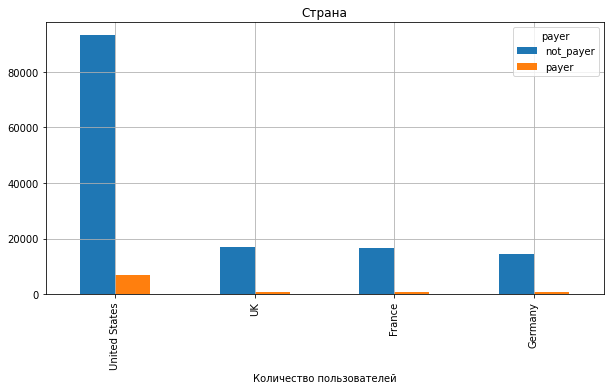

In [38]:
region.plot(kind = 'bar', grid= True, figsize = (10, 5))
plt.xlabel('Количество пользователей')
plt.title('Страна')
plt.show()

Построим таблицу, отражающую долю платящих пользователей по каждой стране.

In [39]:
region['payer_share'] = (region['payer'] / (region['not_payer'] + region['payer']) * 100)
region.sort_values(by='payer_share', ascending=False).style.format({'payer_share': '{:.2f}%'})

По данным таблицам мы можем увидеть, что подавляющее большинство пользователей приходится из США. Далее идет Великобритания и Франция, которые схожи по показателям. И на последнем месте Германия. 

По количеству платящих пользователей США также остается на первом месте. Но второе место теперь занимает Германия. А далее Великобритания и Франция.


#### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [40]:
device =  (profiles
           .pivot_table(
                        index='device',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
device.head()

payer    not_payer  payer
device                   
iPhone       51097   3382
Android      32982   2050
Mac          28130   1912
PC           28918   1537

In [41]:
device.plot(kind = 'bar', grid= True, figsize = (10, 5))
plt.xlabel('Количество пользователей')
plt.title('Устройство')
plt.show()

In [42]:
device['payer_share'] = (device['payer'] / (device['not_payer'] + device['payer']) * 100)
device.sort_values(by='payer_share', ascending=False).style.format({'payer_share': '{:.2f}%'})

По количеству привлеченных как платящих так и не платящих пользователей лидиует IOS.

#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [43]:
channel =  (profiles
           .pivot_table(
                        index='channel',
                        columns='payer',
                        values='user_id',
                        aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
channel.head()

payer           not_payer  payer
channel                         
FaceBoom            25587   3557
TipTop              17683   1878
organic             55279   1160
WahooNetBanner       8100    453
AdNonSense           3440    440

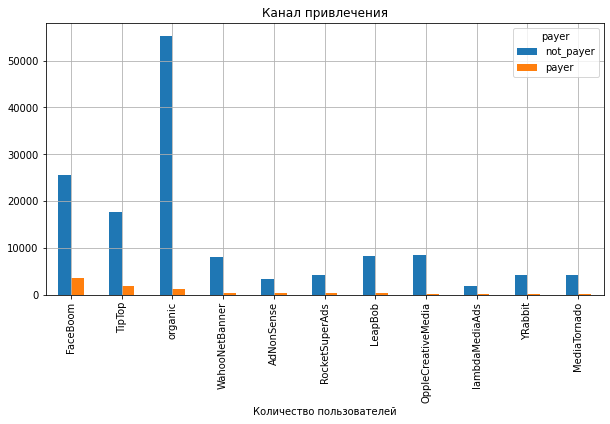

In [44]:
channel.plot(kind = 'bar', grid= True, figsize = (10, 5))
plt.xlabel('Количество пользователей')
plt.title('Канал привлечения')
plt.show()

In [45]:
channel['payer_share'] = (channel['payer'] / (channel['not_payer'] + channel['payer']) * 100)
channel.sort_values(by='payer_share', ascending=False).style.format({'payer_share': '{:.2f}%'})

Больше всего пользователей пришло органическим путем. Но у такого канала привлечения меньше всего доля платящих пользователей. В то время как такие каналы как FaceBoom, TipTop и AdNonSense приводят большее количество платящих пользователей приложения. 

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Посчитайте общую сумму расходов на маркетинг.

In [46]:
total_amount = costs['costs'].sum().round()
print(f'Общая сумма расходов на маркетинг: {total_amount}')

Общая сумма расходов на маркетинг: 105497.0


### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

Посмотрим на затраты на маркетинг в разрезе по каналам привлечения.

In [47]:
channel_costs = (costs
           .pivot_table(
                        index='channel',
                        values='costs',
                        aggfunc='sum')
           .sort_values(by='costs', ascending=False)
          )
channel_costs

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

Наибольшие затраты на маркетинг приходится на такие каналы привлечения как TipTop (54751.30) и FaceBoom (32445.60)

Выведем процент затрат каждого канала от общей суммы, так будет понятней общая картина.

In [48]:
channel_costs['part'] = (channel_costs['costs'] / (costs['costs'].sum()) * 100)
channel_costs.sort_values(by='costs', ascending=False).style.format({'part': '{:.2f}%'})

Почти 52 % приходится на канал привлечения TipTop. 30% трат на рекламу принадлежит FaceBoom. 

### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

Визуализируем динамику изменения расходов по времени по каждому источнику.

In [49]:
costs['week'] =  costs['dt'].dt.isocalendar().week# получите порядковый номер недели из даты
costs['month'] =  costs['dt'].dt.month# получите порядковый номер месяца из даты

Посмотрим на динамику изменения расходов по неделям по каждому источнику.

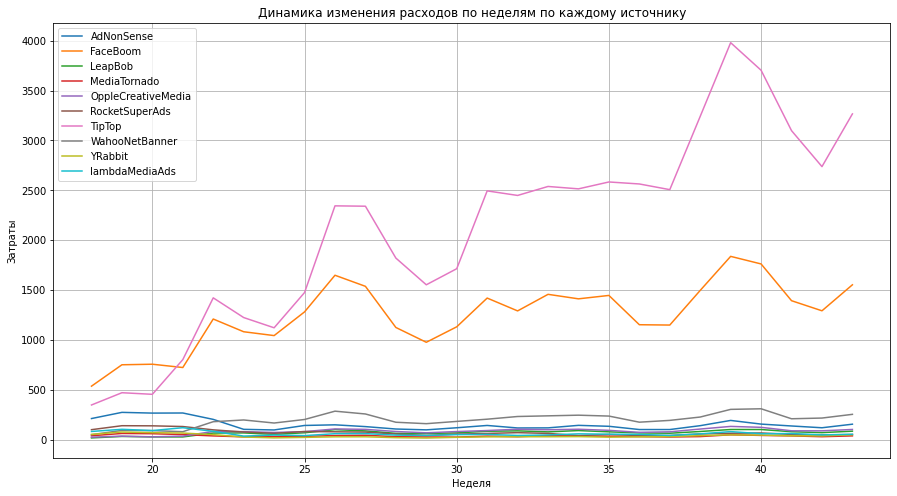

In [50]:
costs_week = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
costs_week.plot(figsize=(15, 8), grid=True) 
plt.title('Динамика изменения расходов по неделям по каждому источнику')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.legend()
plt.show()

Расходы возрастают на такие источники как TipTop и FaceBoom с каждой неделей.

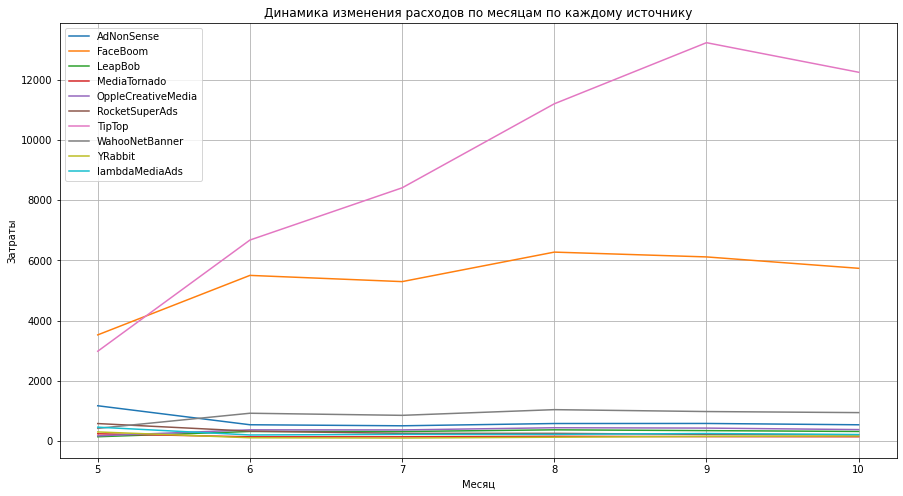

In [51]:
costs_month = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
costs_month.plot(figsize=(15, 8), grid=True) 
plt.title('Динамика изменения расходов по месяцам по каждому источнику')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.legend()
plt.show()

Также как и по неделям с каждым месяцем возрастают расходы все на те же источники.

### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [52]:
profiles.head()

user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769

Рассчитаем средний CAC по каждому каналу привлечения. Для этого сгруппируем отфильтрованные профили и применим функцию mean() к значениям столбца acquisition_cost. Сохраним результат в переменную cac, изменив название столбца acquisition_cost на cac.

In [53]:
# считаем средний CAC по каналам привлечения

cac = (
     profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac.sort_values(by = 'cac', ascending = False)

cac
channel                     
TipTop              2.799003
FaceBoom            1.113286
AdNonSense          1.008054
lambdaMediaAds      0.724802
WahooNetBanner      0.602245
RocketSuperAds      0.412095
OppleCreativeMedia  0.250000
YRabbit             0.218975
MediaTornado        0.218717
LeapBob             0.210172
organic             0.000000

Рассчитаем средний САС на одного пользователя для всего проекта, чтобы увидеть насколько выше среднего САС у популярных каналов. Посчитаем САС, но без канала Organic (этот канал привлечения ничего не стоит).

In [54]:
cac_per = (profiles
              .query('channel != "organic"')[['user_id', 'acquisition_cost']]
              .drop_duplicates()
              .agg({'acquisition_cost': 'mean'})
             )
cac_per

acquisition_cost    1.127481
dtype: float64

Видим, что средний САС на одного пользователя в целом для всего проекта равен 1.127. В то время как у канала TipTop он выше больше, чем в 2 раза. 

На данном этапе мы изучили данные о маркетинге. 

Общая сумма расходов на маркетинг составила 105497. Наибольшая сумма рекламного бюджета приходится на такие каналы как TipTop (52% от общей суммы) и FaceBoom (31% от общей суммы). Расходы на эти каналы увеличиваются с каждой неделей. 

При расчете всех каналов в среднем стоимость одного пользователя выходит 1,13, в то время как стоимость привлечения одного пользователя посредством канала TipTop выше в более чем 2 раза. 

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Исключим из данных органических пользователей, так как они приносят доход, но денег на привлечение пользователей не требуется. Следовательно, расчет окупаемости не требуется.

In [55]:
profiles = profiles.query('channel != "organic"')

Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

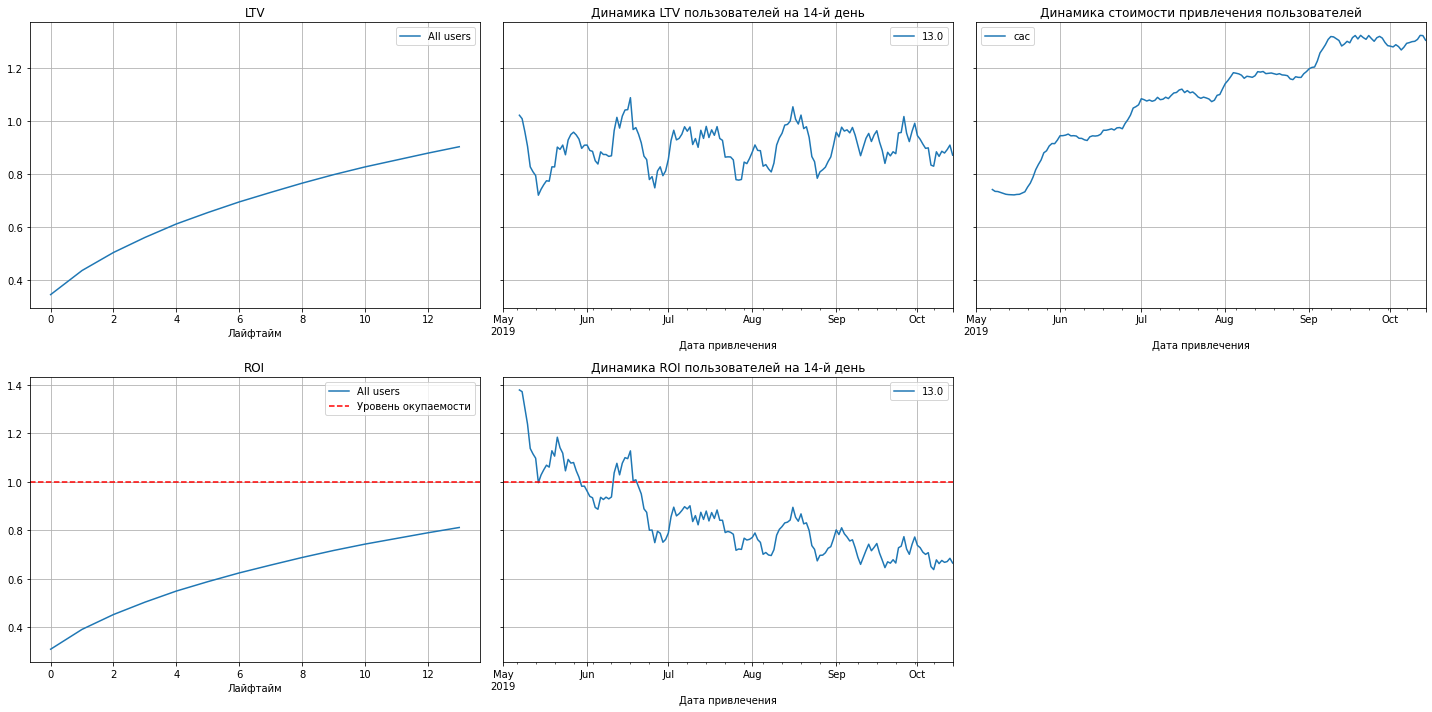

In [56]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, 14
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14) 

Проанализировав графики можно сделать такие выводы:
    
    - Реклама не окупается ко второй неделе и далее (ROI около 80%);
    
    - Динамика стоимости привлечения пользователей возрастает, рекламный бюджет увеличивается;
    
    - Динамика ROI снижается. Показатель в июне - июле был выше окупаемости.
    
    - На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

**Общая конверсия и удержание.**

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().

Text(0.5, 1.0, 'Тепловая карта конверсии')

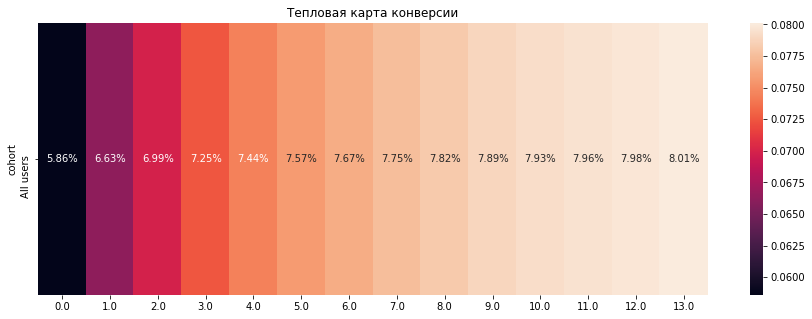

In [57]:
# считаем конверсию 
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, 14
)

# строим хитмэп по таблице конверсии
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии')

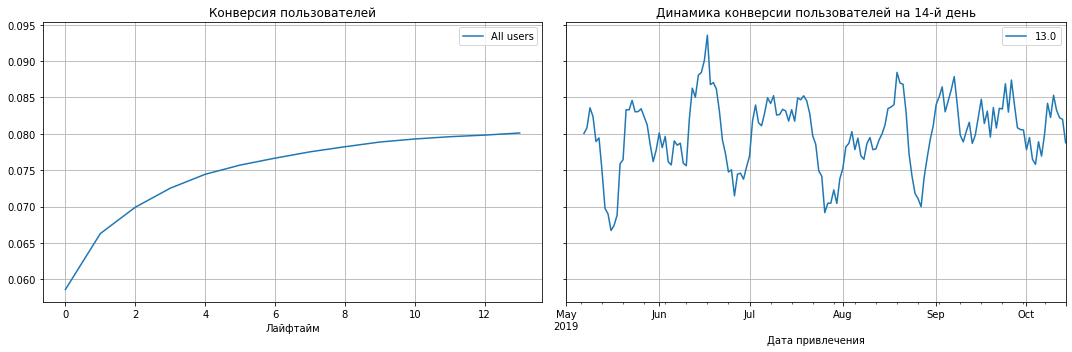

In [58]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, 14
)

plot_conversion(conversion_grouped, conversion_history, 14)

Общая конверсия растет от 5,86% в первый день «жизни» пользователей до 8,01% на 13 день.

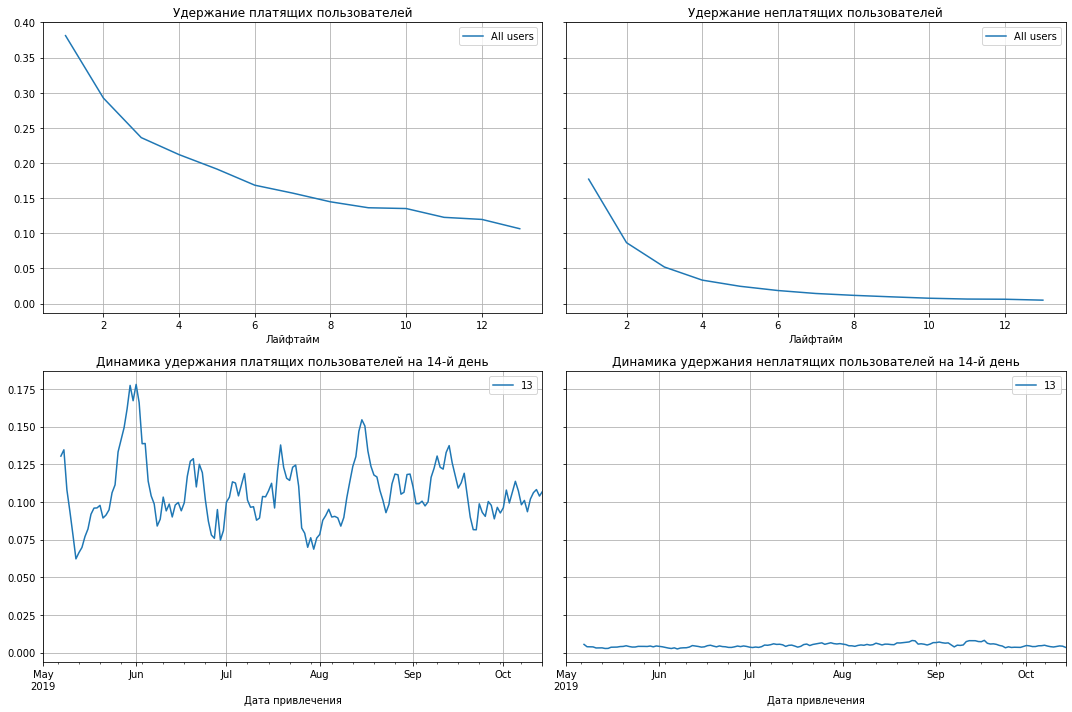

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, 14
)

plot_retention(retention_grouped, retention_history, 14) 

Удержание платящих пользователей снижается. Удержание неплатящих пользователей на 14 день практически на 0. 

**Конверсия и удержание с разбивкой по странам.**

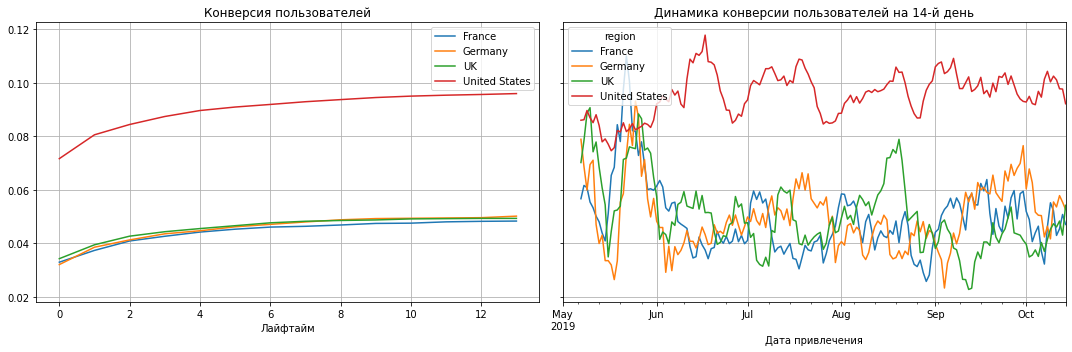

In [60]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, 14, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, 14) 


Конверсия пользователей из США выше почти в 2 раза. 

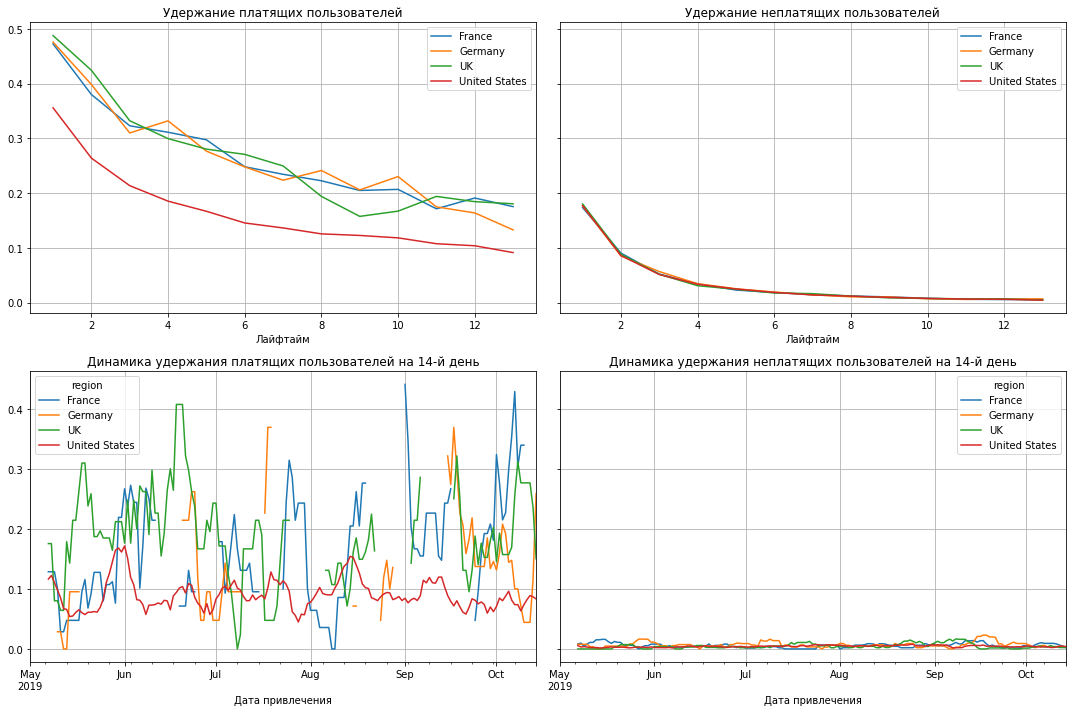

In [61]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, 14, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, 14)

В сравнении с остальными странами у пользователей из США самое низкое удержание платящих пользователей. Неплатящие пользователи не имею каких-либо различий. 

**Конверсия и удержание с разбивкой по каналам привлечения.**

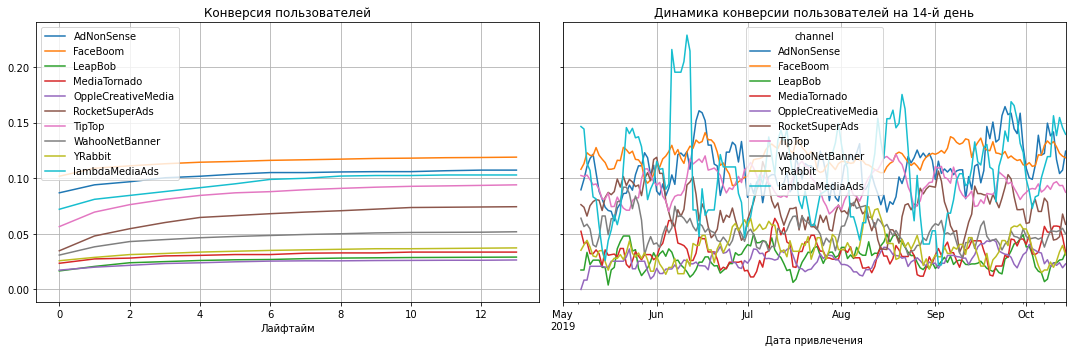

In [62]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, 14, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, 14) 

Хороший показатель конверсии у таких каналов как FaceBoom, AdNonSense, LambdaMediaAds.

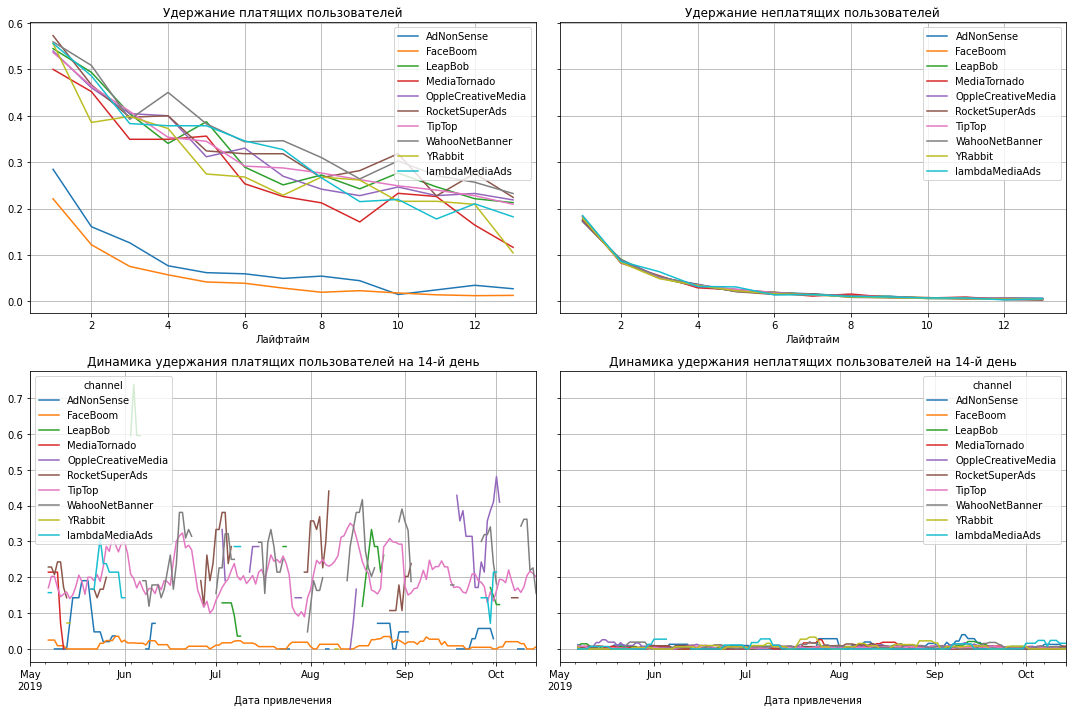

In [63]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, 14, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, 14)

Но, несмотря на хорошую конверсию, удержание платящих пользователей хуже всего у FaceBoom, AdNonSense.

**Конверсия и удержание с разбивкой по устройствам.**

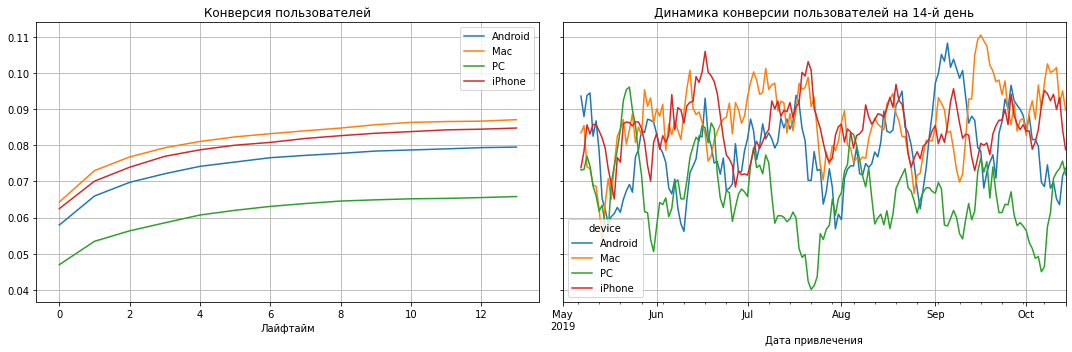

In [64]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, 14, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, 14) 

Конверсия пользователей PC оказалась самой низкой. 

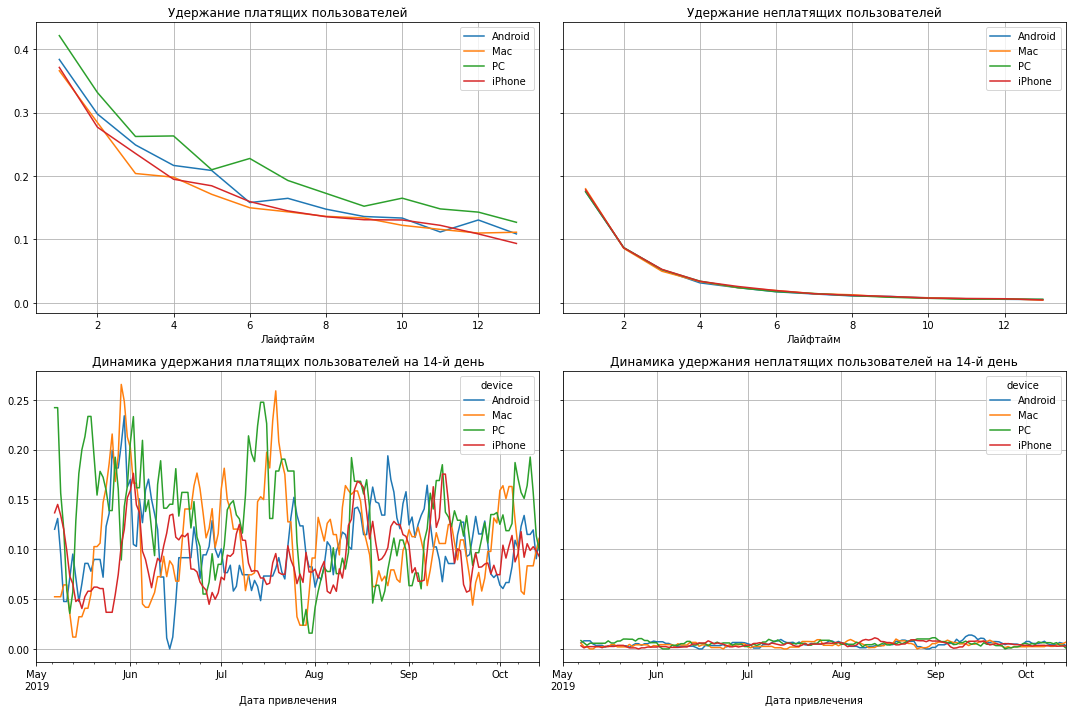

In [65]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, 14, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, 14)

При низкой конверсии PC удержание платящих пользователей довольно хорошее.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

Теперь проверим источники привлечения (channel). Возможно, на окупаемость влияет неудачная реклама в каком-нибудь одном канале.

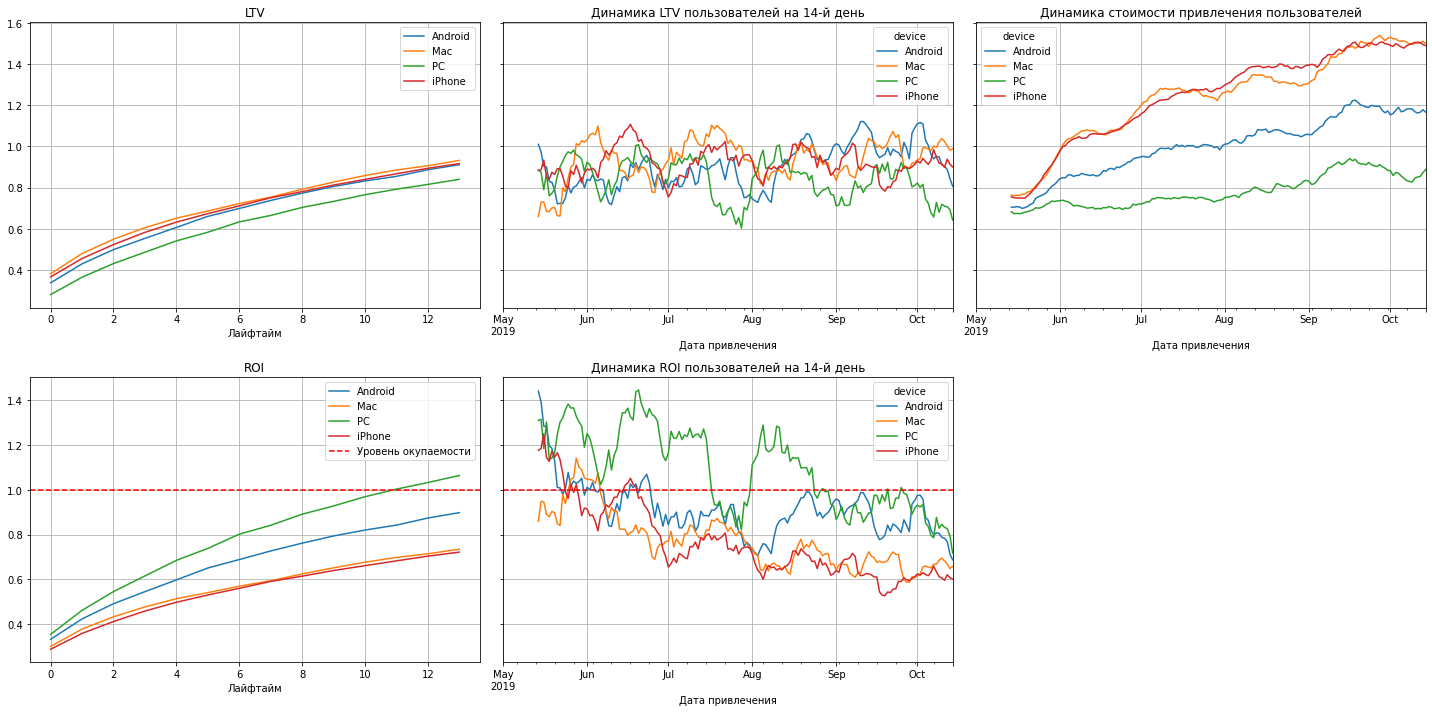

In [66]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, 14, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14)

Стоимость привлечения для всех устройств со временем возрастала. Для Mac IPhone самая высокая стоимость рекламы. Но при этом окупаемость самая низкая. Хороший показатель у PC. При самой низкой стоимости привлечения отличная окупаемость. 

### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

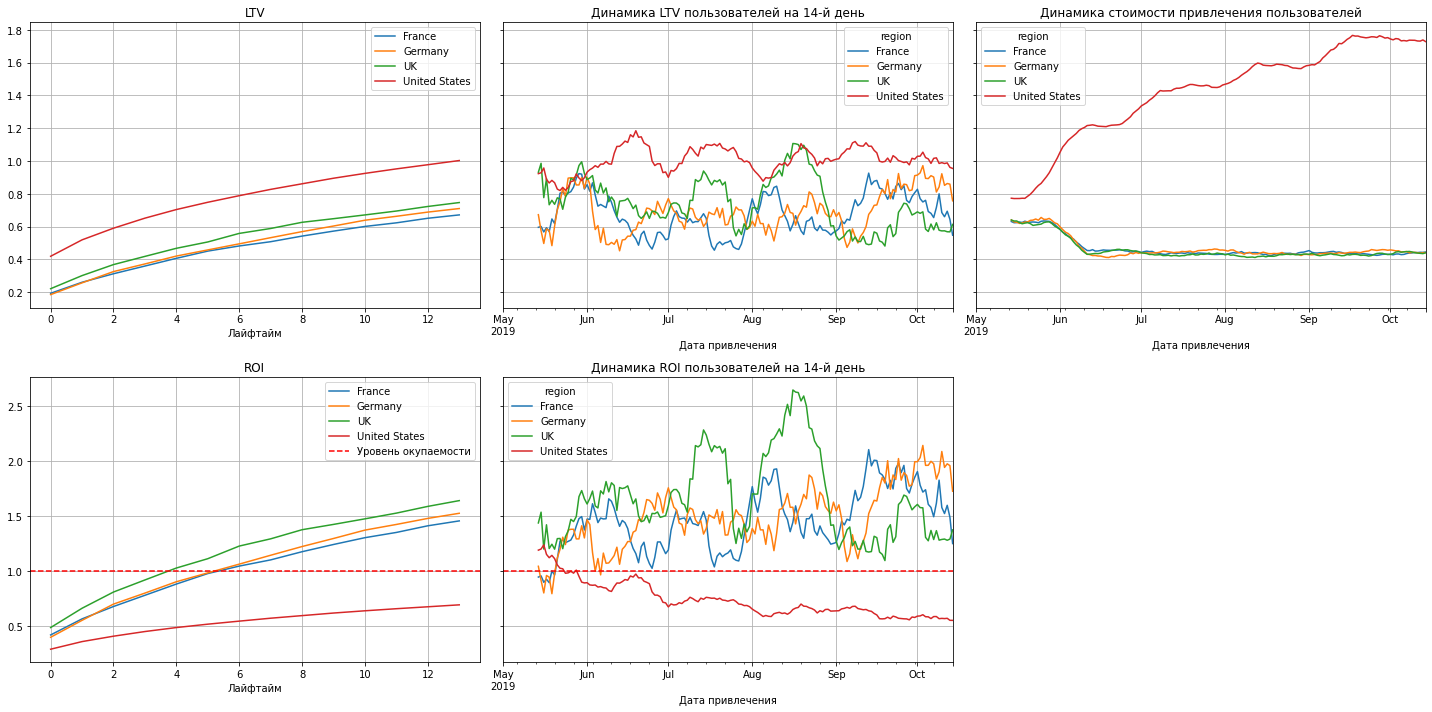

In [67]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, 14, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14)

Для привлечения пользователей из США уходит много средств рекламного бюджета, но результата от этого нет. Привлечение этих пользователей не окупается. Они быстро приходят, но также быстро перестают пользоваться приложением. 
Хорошая динамика окупаемости у Великобритании при том, что стоимость привлечения пользователей не высока. 

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

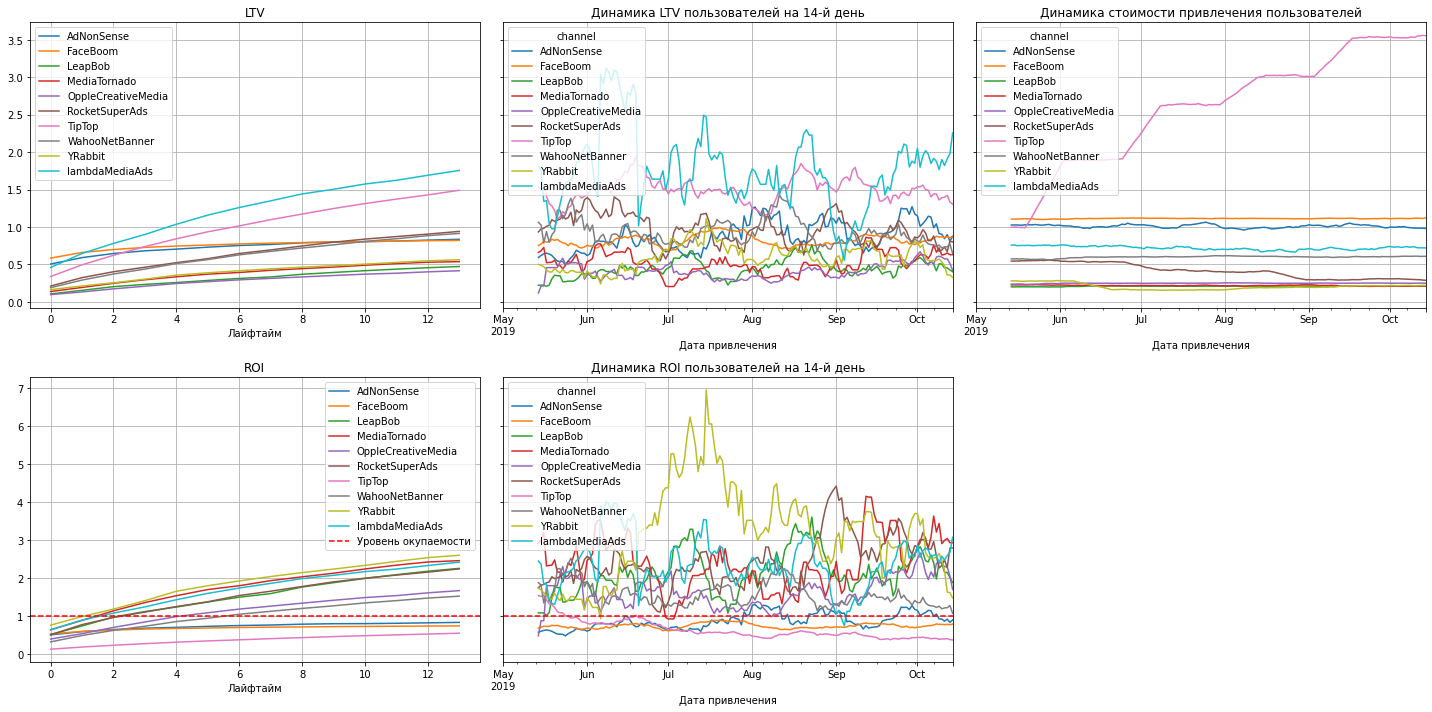

In [68]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, 14, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14)

Самыми не окупающимися каналами оказались TipTop, FaceBoom и AdNonSense.
Стоимость привлечения пользователей каналала TipTop возрастает с каждым разом, но к сожалению, результата не дает. 

lambdaMediaAds и YRabbit кажутся перспективными каналами привлечения. Низкая стоимость рекламы, но при этом показатели окупаемости и "жизни" пользователей хорошие.

### Ответьте на вопросы:

Окупается ли реклама, направленная на привлечение пользователей в целом?

В целом релама, направленная на привлечение пользователей окупается очень слабо. 

Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Окупаемость рекламы в США очень низкая. Пользователи быстро приходят, но также быстро перестают пользоваться приложением. 
Для Mac IPhone самая высокая стоимость рекламы. Но при этом окупаемость самая низкая. 
Стоимость привлечения пользователей каналала TipTop возрастает с каждым разом, но к сожалению, результата не дает.

Чем могут быть вызваны проблемы окупаемости?

Проблемы окупаемости по большей степени связаны с неправильным распределением рекламного бюджета. Большинство средств уходит на те каналы привлечения, которые не приносят хорошего результата. Также как и большинство средств уходит на привлечение пользователей из США, но они быстро теряют интерес к приложению. Также рекламные средства в основном уходят на пользователей IOS, которые также долго не используют приложение.  

## Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

### Выделите причины неэффективности привлечения пользователей.

Мы провели анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Нашей задачей было разобраться в причинах и помочь компании выйти в плюс. 

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
 
 - лог сервера с данными об их посещениях,

 - выгрузка их покупок за этот период,

 - рекламные расходы. 

Мы изучили: 

 - откуда приходят пользователи и какими устройствами они пользуются,

 - сколько стоит привлечение пользователей из различных рекламных каналов;

 - сколько денег приносит каждый клиент,

 - когда расходы на привлечение клиента окупаются,

 - какие факторы мешают привлечению клиентов.


В результате исследования мы выявили, что основной причиной финансовых проблем являются траты на привлечение пользователей. Исход из графиков, мы можем сформулировать некоторые выводы: 

 - Реклама не окупается ко второй неделе и далее (ROI около 80%);

 - Динамика стоимости привлечения пользователей возрастает, рекламный бюджет увеличивается;

 - Динамика ROI снижается. Показатель в июне - июле был выше окупаемости;

 - На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен;
 
 - Общая конверсия пользователей была от 6 до 8 %. При этом, удержание пользователей слабовато. 
 
Чтобы понять причины возникших проблем, мы проанализировали характеристики пользователей - страну проживания, устройство, с которого используют приложение, каналы привлечения, конверсию и удержание. Вот что мы увидели исходя из графиков:


 1. В разбивке по стране: 
  
  Большинство пользователей приходится из США. И конверсия выше почти в 2 раза в сравнении с остальными странами. При этих показателях, удержание пользователей в США самая низкая. А расход на привлечение пользователей самый высокий. 
  
  У Англии, Франции и Германии слабая конверсия, но и процент пользователей из этих стран намного меньше. Англия показывает хорошие показатели в окупаемости рекламы на привлечение пользователей, а также хороший уровень удержания. 
  
 
 2. В разбивке по устройствам:
 
 В целом мы можем наблюдать рост стоимости на привлечение пользователей всех устройств. У Mac и IPhone самая высокая стоимость привлечения, в то время как у PC самая низкая. PC показывает низкий уровень конверсии, но при этом хорошее удержание пользователей. Пользователи Mac и IPhone имеют высокую конверсию и хороший уровень удержания пользователей. 
 
 
 3. В разбивке по каналу привлечения пользователей:
 
 Большая стоимость привлечения пользователей у канала TipTop, которая со временем еще увеличивается. Самыми не окупающимися каналами оказались TipTop, FaceBoom и AdNonSense. Канал FaceBoom показал самое слабое удержание, при высокой конверсии.  

### Сформулируйте рекомендации для отдела маркетинга.

В связи с проведенным анализом, можно сформулировать следующие рекомендации:

1. Следует более детально рассмотреть каналы привлечения в США. Не расходовать большую часть рекламного бюджета на такие источники как TipTop и FaceBoom. Возможно отказаться от них вовсе в пользу других рекламных площадок, которые приносят большую окупаемость. Стоит обратить внимание на такой канал привлечения как lambdaMediaAds.

2. Также можно перераспределить бюджет на привлечение пользователей не только из США. Возможно, следует поровну распределять бюджет между всеми странами. В целом у них хороший показатель окупаемости. Например Англия в целом имеет хорошие показатели в удержании пользователей, а также оправдывает расходы на рекламу. 

3. У PC хороший показатель окупаемости, а также удержания пользователей. Но конверсия страдает. Возможно, стоит рассмотреть варианты улучшения этого показателя у данного девайса. 

4. Следует обратить внимание на уровень окупаемости пользователей  Mac и IPhone. При высокой стоимости привлечения пользователей и хороших показателях конверсии, окупаемость рекламы находится на низком уровне. Возможно, следует разработать специальные предложения для пользователй этих устройств.  

4. Следует также лучше поработать с органическими пользователями, так как это существенная доля дохода приложения